# Transformada de Hough

## Introdução

A **Transformada de Hough** é uma forma de se obter linhas ou círculos de uma imagem. É mais rápido do que as operações de detecção de borda, encontrando linhas ou círculos utilizando menos custo computacional.

Dados *n* pontos em uma imagem, deseja-se encontrar subconjuntos desses pontos que estão em linhas retas. Uma solução possível é encontrar primeiro todas as linhas que são determinadas por cada par de pontos e, em seguida, encontrar todos os subconjuntos de pontos que estão próximos de linhas específicas.

## Implementação

In [1]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import math
from IPython.display import Image

### Linhas

1. Em geral, para cada ponto $(x_\theta,y_\theta)$, definir o conjunto de retas que passa por esse ponto:
    + $r_\theta =  x_0 cos_\theta + y_0sin_\theta $
    + Cada par $(r_\theta, \theta)$ representando uma linha que passa por $(x_\theta,y_\theta)$.
2. Para cada ponto, pode-se traçar os conjuntos de retas que passam por ele, obtendo uma senoide.
3. Em geral, uma linha pode ser detectada encontrando o número de interseções entre as curvas.
    + Quanto mais curvas se interceptam, significa que a linha representada por essa interseção tem mais pontos.
    + Pode-se definir um número mínimo de interseções necessárias para detectar e considerar uma linha.
    

In [2]:
def HoughLines(img, accthr=150):  
    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(img, cv.COLOR_GRAY2BGR)    
    lines = cv.HoughLines(img, 1, np.pi / 180, accthr, None, 0, 0)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)            
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

            cv.line(cdst, pt1, pt2, (225,0,200), 1, cv.LINE_AA)
            
    return cdst

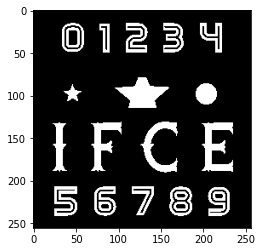

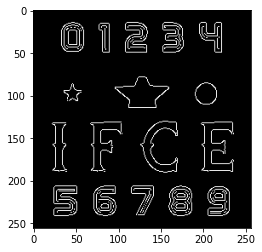

In [3]:
imgA00 = cv.imread("../gcPDI2/imgPDI2/gcmyshapes.tif",0)
imgA01 = cv.Canny(imgA00, 50, 200,apertureSize=3)
plt.imshow(imgA00, 'gray')
plt.show()
plt.imshow(imgA01, 'gray')
plt.show()

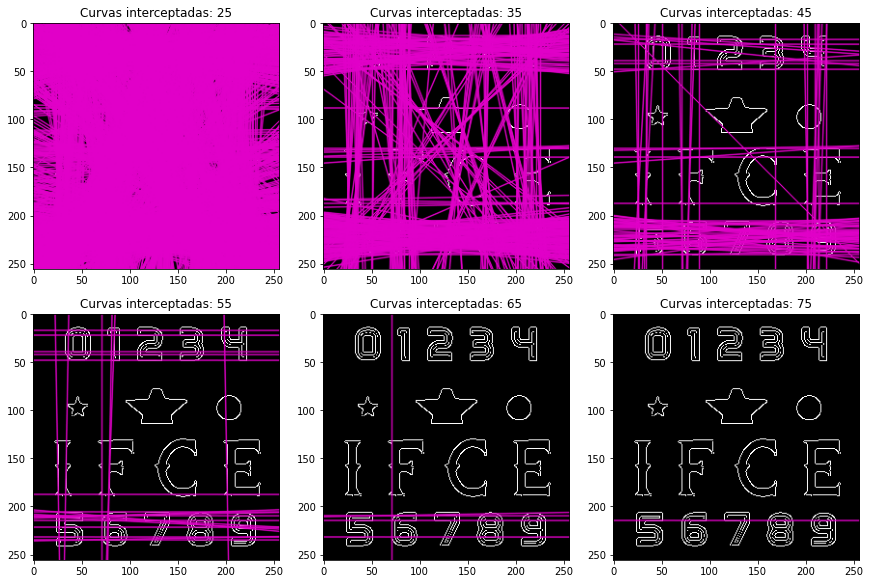

In [4]:
f, axarr = plt.subplots(2, 3, constrained_layout=True)
f.set_figheight(8)
f.set_figwidth(12)
for i in range(2):
    for j in range(3):
        Cint = 25+j*10+i*30
        imgA02 = HoughLines(imgA01, Cint)
        axarr[i,j].imshow(imgA02)
        axarr[i,j].set_title("Curvas interceptadas: {}".format(Cint))
plt.show()

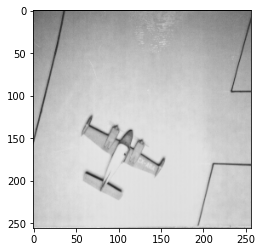

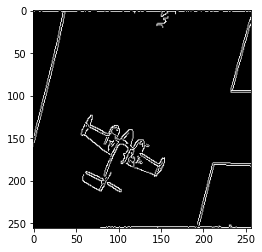

In [5]:
imgB00 = cv.imread("../gcPDI2/imgPDI2/track.tiff")
imgB01 = cv.Canny(imgB00, 50, 200,apertureSize=3)
plt.imshow(imgB00, 'gray')
plt.show()
plt.imshow(imgB01, 'gray')
plt.show()

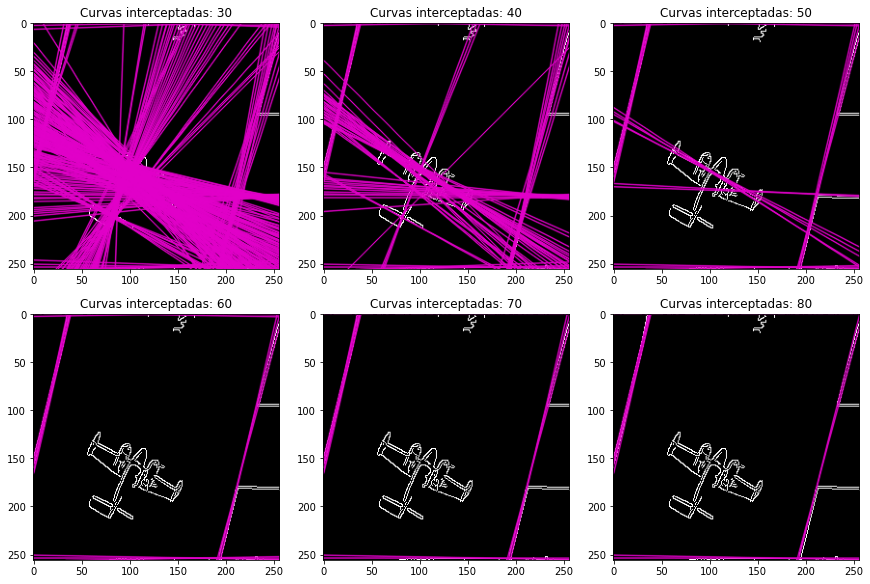

In [6]:
f, axarr = plt.subplots(2, 3, constrained_layout=True)
f.set_figheight(8)
f.set_figwidth(12)
for i in range(2):
    for j in range(3):
        Cint = 30+j*10+i*30
        imgB02 = HoughLines(imgB01, Cint)
        axarr[i,j].imshow(imgB02)
        axarr[i,j].set_title("Curvas interceptadas: {}".format(Cint))
plt.show()

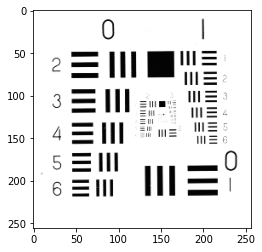

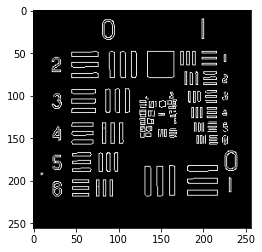

In [7]:
imgC00 = cv.imread("../gcPDI2/imgPDI2/someshapes.tiff")
imgC01 = cv.Canny(imgC00, 50, 200,apertureSize=3)
plt.imshow(imgC00, 'gray')
plt.show()
plt.imshow(imgC01, 'gray')
plt.show()

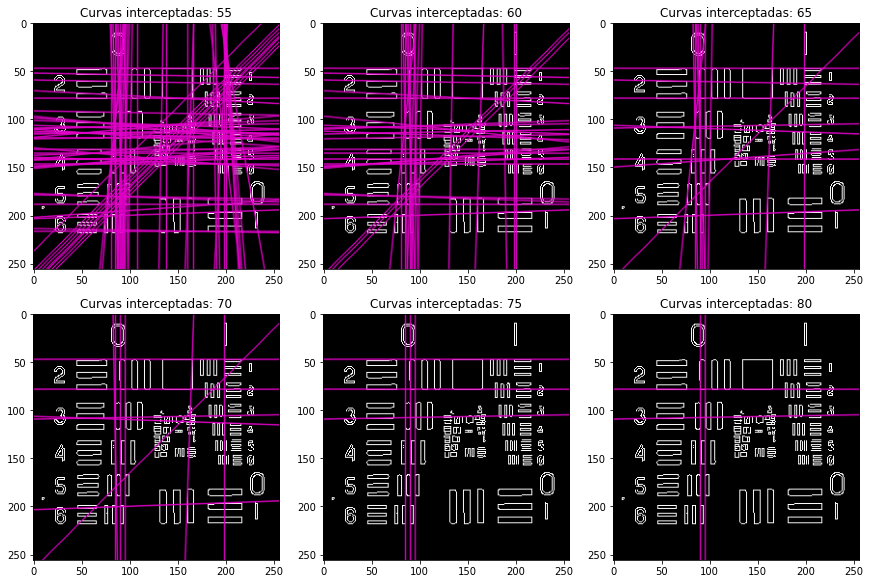

In [8]:
f, axarr = plt.subplots(2, 3, constrained_layout=True)
f.set_figheight(8)
f.set_figwidth(12)
for i in range(2):
    for j in range(3):
        Cint = 55+j*5+i*15
        imgC02 = HoughLines(imgC01, Cint)
        axarr[i,j].imshow(imgC02)
        axarr[i,j].set_title("Curvas interceptadas: {}".format(Cint))
plt.show()

### Círculos

In [65]:
def HoughCircles(img, p1val=50, p2val=30):
    cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
    rows,cols = img.shape
    maxR = int((rows+cols)/4)
    #img, #method, #Inverse ratio of the accumulator resolution to the image resolution
    #Minimum distance between the centers of the detected circles, #higher threshold of the two passed to the Canny edge detector
    #Accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected.
    circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,param1=p1val,param2=p2val,minRadius=0,maxRadius=maxR)
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv.circle(cimg,(i[0],i[1]),i[2],(0,200,225),2)
        # draw the center of the circle
        cv.circle(cimg,(i[0],i[1]),2,(225,200,0),2)
    return cimg

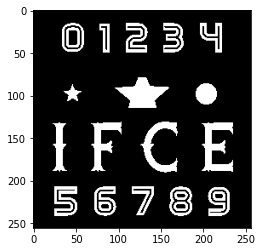

In [66]:
imgA10 = cv.imread("../gcPDI2/imgPDI2/gcmyshapes.tif",0)
plt.imshow(imgA10, 'gray')
plt.show()

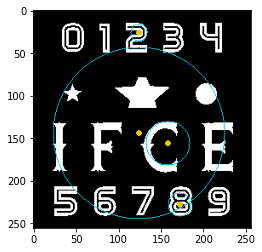

In [67]:
imgA11 = HoughCircles(imgA10)
plt.imshow(imgA11)
plt.show()

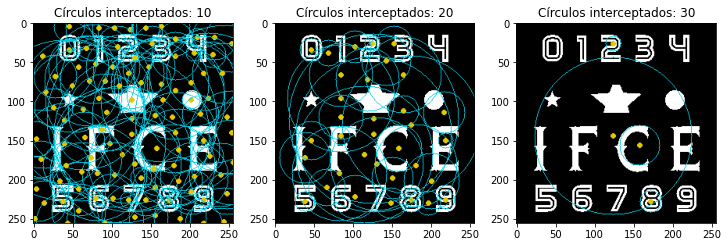

In [70]:
f, axarr = plt.subplots(1, 3, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10)

imgA11 = HoughCircles(imgA10,p1val=50,p2val=10)
axarr[0].imshow(imgA11)
axarr[0].set_title("Círculos interceptados: 10")

imgA11 = HoughCircles(imgA10,p1val=50,p2val=20)
axarr[1].imshow(imgA11)
axarr[1].set_title("Círculos interceptados: 20")

imgA11 = HoughCircles(imgA10,p1val=50,p2val=30)
axarr[2].imshow(imgA11)
axarr[2].set_title("Círculos interceptados: 30")

plt.show()

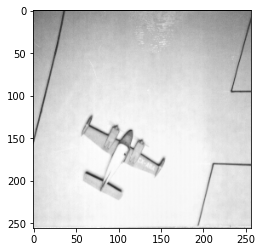

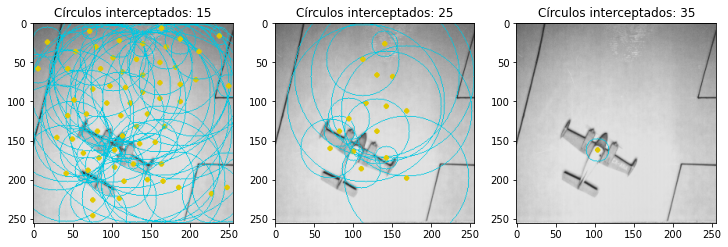

In [71]:
imgB10 = cv.imread("../gcPDI2/imgPDI2/track.tiff",0)
plt.imshow(imgB10,'gray')
plt.show()

f, axarr = plt.subplots(1, 3, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10)

imgB11 = HoughCircles(imgB10,p1val=50,p2val=15)
axarr[0].imshow(imgB11)
axarr[0].set_title("Círculos interceptados: 15")

imgB11 = HoughCircles(imgB10,p1val=50,p2val=25)
axarr[1].imshow(imgB11)
axarr[1].set_title("Círculos interceptados: 25")

imgB11 = HoughCircles(imgB10,p1val=50,p2val=35)
axarr[2].imshow(imgB11)
axarr[2].set_title("Círculos interceptados: 35")

plt.show()

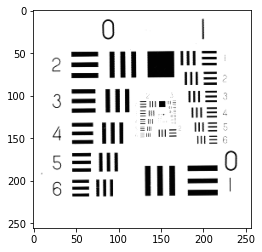

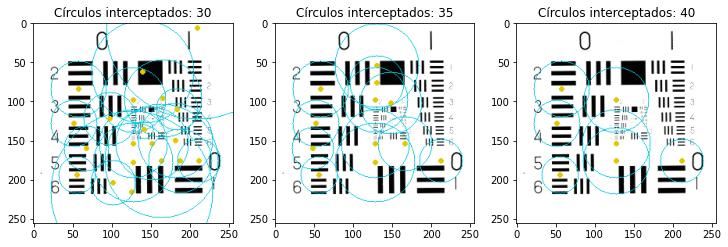

In [73]:
imgC10 = cv.imread("../gcPDI2/imgPDI2/someshapes.tiff",0)
plt.imshow(imgC10,'gray')
plt.show()

f, axarr = plt.subplots(1, 3, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10)

imgB11 = HoughCircles(imgC10,p1val=50,p2val=30)
axarr[0].imshow(imgB11)
axarr[0].set_title("Círculos interceptados: 30")

imgC11 = HoughCircles(imgC10,p1val=50,p2val=35)
axarr[1].imshow(imgC11)
axarr[1].set_title("Círculos interceptados: 35")

imgC11 = HoughCircles(imgC10,p1val=50,p2val=40)
axarr[2].imshow(imgC11)
axarr[2].set_title("Círculos interceptados: 40")

plt.show()

### Teste com Linhas e Círculos

In [201]:
def HoughLnC(img, accthr=150, p1val=50, p2val=30):  
    # Copy edges to the images that will display the results in BGR
    cannyimg = cv.Canny(img, 50, 200,apertureSize=3)
    cdst = cv.cvtColor(img, cv.COLOR_GRAY2BGR)    
    lines = cv.HoughLines(cannyimg, 1, np.pi / 180, accthr, None, 0, 0)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)            
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

            cv.line(cdst, pt1, pt2, (225,0,200), 2, cv.LINE_AA)       

    #cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
    rows,cols = img.shape
    maxR = int((rows+cols)/4)
    #img, #method, #Inverse ratio of the accumulator resolution to the image resolution
    #Minimum distance between the centers of the detected circles, #higher threshold of the two passed to the Canny edge detector
    #Accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected.
    circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,param1=p1val,param2=p2val,minRadius=0,maxRadius=maxR)
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv.circle(cdst,(i[0],i[1]),i[2],(0,200,225),2)
        # draw the center of the circle
        cv.circle(cdst,(i[0],i[1]),2,(225,200,0),2)
    return cdst


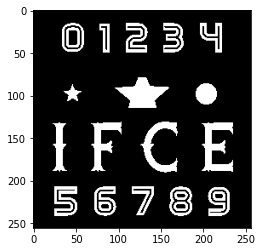

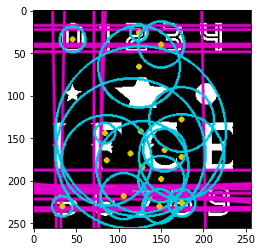

In [202]:
imgC10 = cv.imread("../gcPDI2/imgPDI2/gcmyshapes.tif",0)
plt.imshow(imgC10, 'gray')
plt.show()

imgC11 = HoughLnC(imgC10, accthr=55, p1val=50, p2val=25)
plt.imshow(imgC11, 'gray')
plt.show()

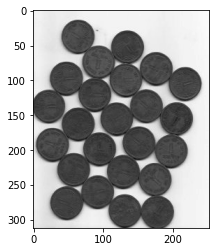

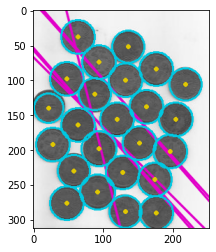

In [203]:
imgC10 = cv.imread("../gcPDI2/imgPDI2/watercoins.jpeg",0)
plt.imshow(imgC10, 'gray')
plt.show()

imgC11 = HoughLnC(imgC10, accthr=50, p1val=500, p2val=25)
plt.imshow(imgC11, 'gray')
plt.show()

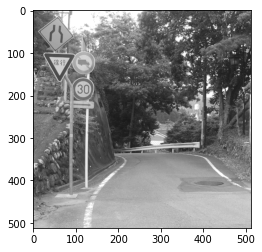

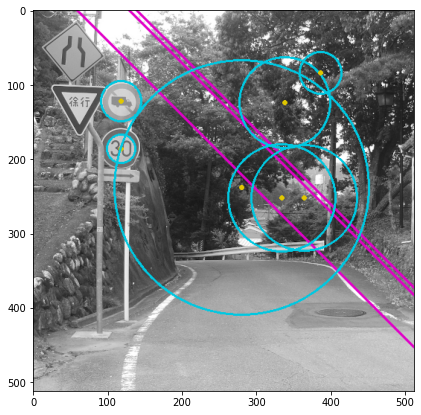

In [208]:
imgC10 = cv.imread("../gcPDI2/imgPDI2/japanstreet2.jpeg",0)
plt.imshow(imgC10, 'gray')
plt.show()

imgC11 = HoughLnC(imgC10, accthr=250, p1val=555, p2val=40)

fig = plt.figure(1)
fig.set_figheight(7)
fig.set_figwidth(7)
plt.imshow(imgC11)
plt.show()

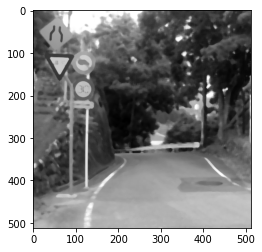

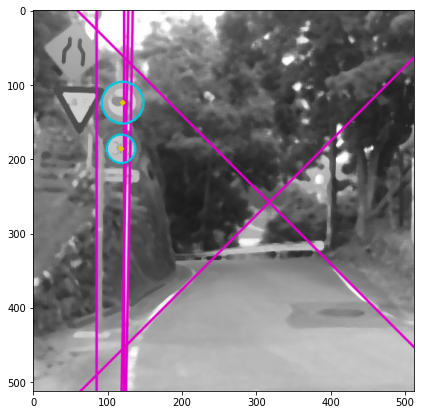

In [209]:
imgC10 = cv.imread("../gcPDI2/imgPDI2/japanstreet2.jpeg",0)
imgC10 = cv.medianBlur(imgC10,7)
plt.imshow(imgC10, 'gray')
plt.show()

imgC11 = HoughLnC(imgC10, accthr=115, p1val=300, p2val=30)

fig = plt.figure(1)
fig.set_figheight(7)
fig.set_figwidth(7)
plt.imshow(imgC11)
plt.show()

## Conclusão

A Transformada de Hough se destaca de outros processos por seu desempenho, dado o seu basto custo computacional.

Para a obtenção de linhas, o método é recomendado para imagens com poucas informações de contorno, podendo ser necessário tomar maiores cuidados com o pré-processamento a ser aplicado.

Para obtenção de círculos, o método tenta obter elementos próximos que possam orientar uma circunferência, retornando círculos não esperados quando a imagem possui muitas informações de contorno. Assim, é preciso mais atenção com o pré-processamento de suavização e com os parâmetros do método.

Com alguns resultados obtidos, as linhas obtidas podem ser interpretadas mais como caminhos do que contornos. A depender das características da imagem, então esses caminhos podem ser considerados contornos ou divisórias de regiões. Quanto aos círculos, mostra-se mais necessário obter informações dos objetos que se deseja interpretar como círculos para melhor parametrizar o processo de Círculos de Hough, bem como do pré-processamento para valorizar a circunferência dos objetos.

## Fontes

GONZALEZ, Rafael.; WOODS, Richard. **Digital Image Processing**. 3. ed. Upper Saddle River: Pearson, 2008.